In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
def fancy_plot_trajectories(ts,n_bins = 20, title: str = 'A very cool plot', display: int = 50, save: str = '') -> None:
    """
    Makes a very fancy plot of BM and its distribution
    
    Arguments:
        ts:      matrix of trajectories per time steps
        title:   title of the plot 
        display: number of trajectories shown in the plot
        
    Output:
        None
    """
    
    time_steps = ts.shape[0] - 1
    n          = ts.shape[1]

    # changing index to its xlabel
    index  = np.arange(0,1+1/time_steps,1/time_steps)  
    df     = pd.DataFrame(ts)

    # z is the outcome of the trajectories, it defines the distribution.
    z      = df.iloc[-1]
    color  = plt.cm.get_cmap('turbo')((z - z.min()) / (z.max() - z.min())) # fancy color map for the trajectories :)

    # Displaying few trajectories

    df = df.iloc[:,:display]

    # layout
    fig = plt.figure()
    gs  = fig.add_gridspec(1, 2, wspace=0, width_ratios=[9, 2])
    ax  = gs.subplots(sharey=True)

    # line chart

    df.plot( figsize=(8,6), title=(title),grid = False, legend=False, ax=ax[0],
            color=color)


    #histogram
    
    cnt, bins, patches = ax[1].hist(
        z, np.linspace(z.min(), z.max(), n_bins),
        ec='k', orientation='horizontal', density = True)

    colors = plt.cm.get_cmap('turbo')((bins - z.min()) / (z.max() - z.min())) # fancy color map for the histogram :)
    ax[1].set_xticks([])
    for i, p in enumerate(patches):
        p.set_color(colors[i])

    ax[0].set_xlabel('time',fontsize = 14)
    ax[0].set_ylabel('value', fontsize = 14)
    
    if save != '':
        plt.savefig(save + '.pdf')
        
    plt.show()

In [11]:
# Parameters

steps        = 100
trajectories = 100

S0 = 1

c  = 0.25

p  = 0.51


strategy_constant   = lambda X,Sn, c: ((Sn + c) * X +  (Sn - c) * (np.logical_not(X))) * (Sn != 0)
strategy_kelly_frac = lambda X,Sn, p, f: ((Sn + (2*p - 1)* f * Sn) * X +  (Sn - (2*p - 1) * f * Sn) * (np.logical_not(X)))*  (Sn != 0)

In [12]:
uniforms_bool = np.random.rand(trajectories, steps) < p

In [13]:
trajectory_c       = np.zeros((trajectories, steps + 1))
trajectory_c[:, 0] = S0

trajectory_f       = np.zeros((trajectories, steps + 1))
trajectory_f[:, 0] = S0

kellys = []

for k in [0.2, 0.5, 1, 1.5, 2.5]:
    trajectory_f       = np.zeros((trajectories, steps + 1))
    trajectory_f[:, 0] = S0
    for step in range(steps):
        if k == 0.2:
            trajectory_c[:, step + 1] = strategy_constant(uniforms_bool[:,step], trajectory_c[:,step], 0.5)
            
        trajectory_f[:, step + 1] = strategy_kelly_frac(uniforms_bool[:,step], trajectory_f[:,step], p, k)

    kellys.append(trajectory_f)
    

In [14]:
print(np.mean(trajectory_c[:,-1]))
for k in range(len(kellys)):
    print(np.mean(kellys[k][:,-1]))

1.35
1.0113246641103935
1.028190098217207
1.0560354431736185
1.0836533008149514
1.1386913082802201


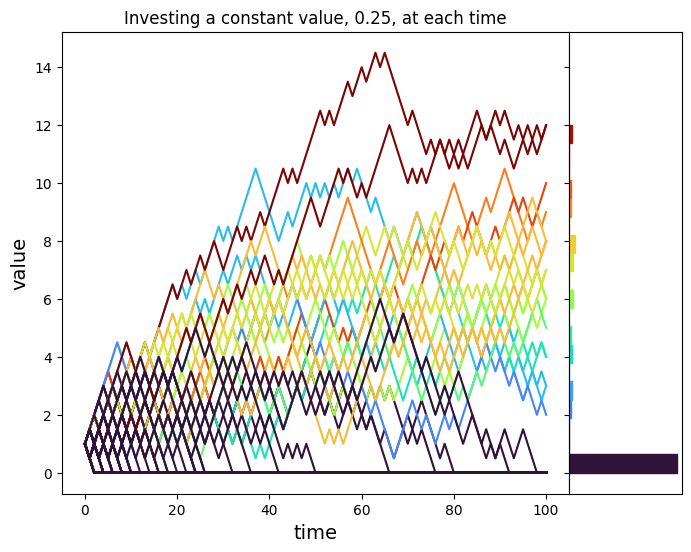

In [15]:
fancy_plot_trajectories(trajectory_c.transpose(), display = trajectories, title = 'Investing a constant value, 0.25, at each time', save= 'constant_invest')

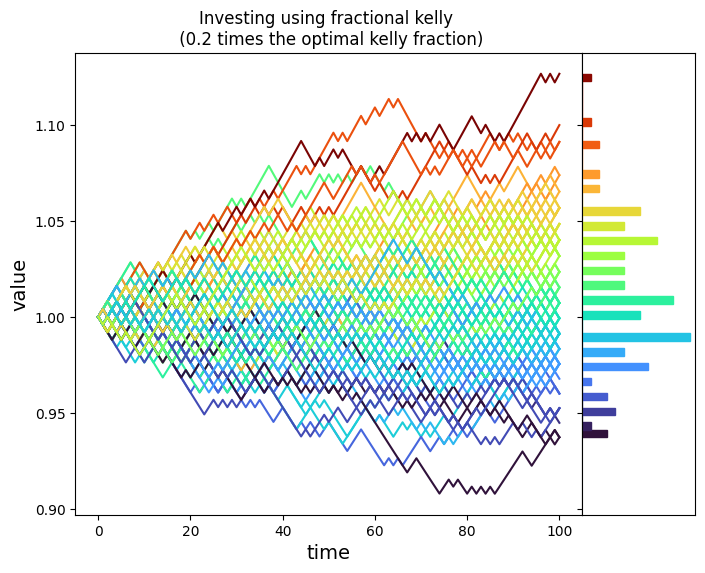

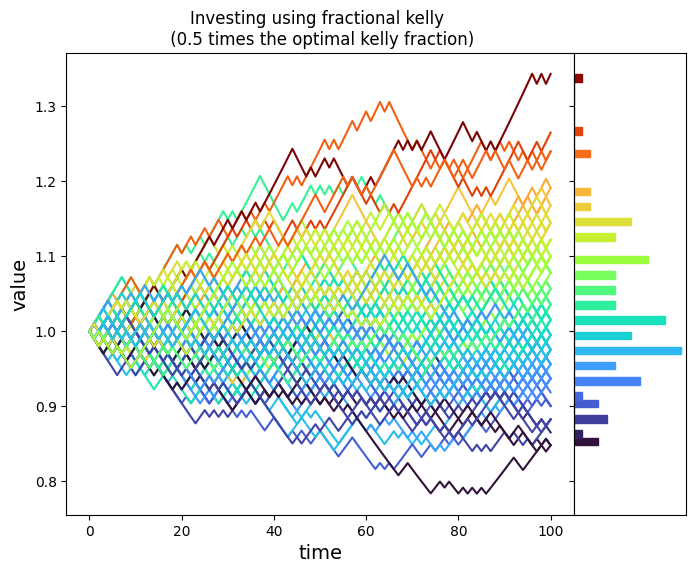

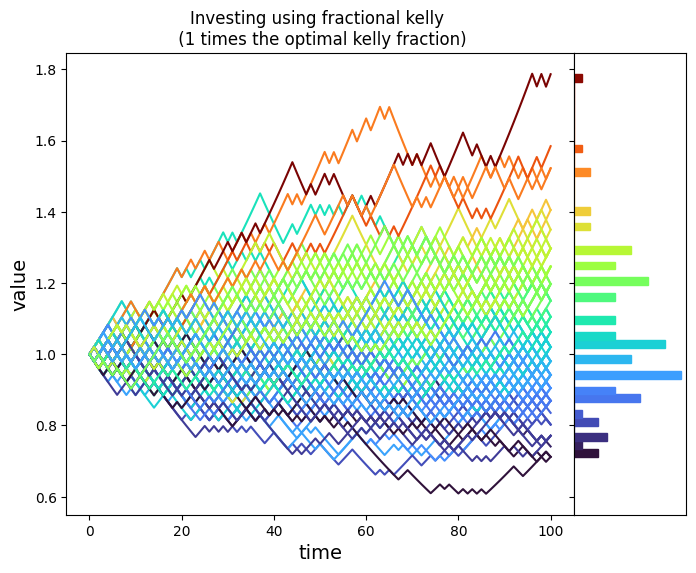

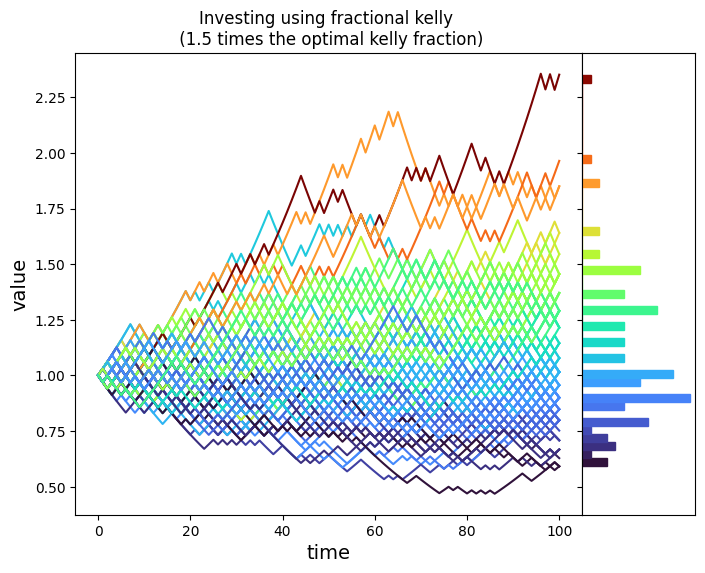

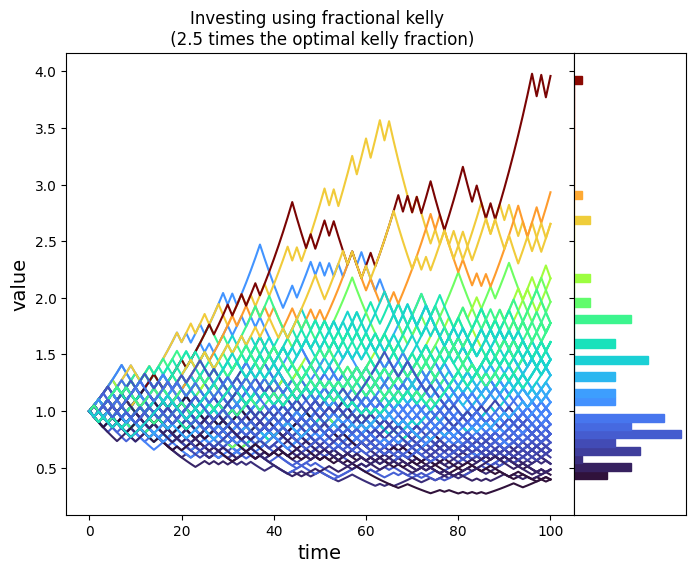

In [16]:
kelly_fractions = [0.2, 0.5, 1, 1.5, 2.5]

for k in range(len(kellys)):
    fancy_plot_trajectories(kellys[k].transpose(),title= f'Investing using fractional kelly \n ({kelly_fractions[k]} times the optimal kelly fraction)' , 
                            save = f'kelly_{kelly_fractions[k]}', n_bins= 50, display = trajectories)